# Введение в Azure Notebooks

[Azure Notebooks](http://notebooks.azure.com) - это облачная реализация технологии [Jupyter Notebook](http://jupyter.org/) в облаке Microsoft Azure.

Notebooks удобно использовать, когда вам нужно комбинировать текст и программный код:

  * [Вычислительная журналистика](https://en.wikipedia.org/wiki/Data-driven_journalism)
  * Преподавание компьютерных дисциплин
  * и др.
 
 
 Azure Notebooks поддерживают следующие языки программирования:
 
  * Python (2,3)
  * F#
  * R
 
 
 Для разметки текста используется Markdown с вкраплениями $\LaTeX$
  

## Небольшое введение в numpy

**[NumPy](https://numpy.org/)** это open-source модуль для **`Python`**, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций

Команда для установки **NumPy** через **Anaconda**:
- `conda install -c anaconda numpy`

**`Все операции (*, +, numpy.sin()) в NumPy выполняются по-элементно!`**

**[numpy.arange(x)](https://numpy.org/devdocs/reference/generated/numpy.arange.html?highlight=arange)** - получение массива **`x`** чисел с одинаковыми промежутками

In [2]:
import numpy as np

# получение массива чисел с одинаковыми промежутками
x = np.arange(25)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


**[numpy.reshape(x)](https://numpy.org/devdocs/reference/generated/numpy.reshape.html?highlight=reshape)** - преобразование массива в массив в виде **`x`**

In [3]:
# преобразование одномерного массива в массив в виде матрицы 5*5
x = x.reshape(5,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**[numpy.astype(x)](https://numpy.org/devdocs/reference/generated/numpy.ndarray.astype.html)** - преобразование массива в типизированный массив с типом **`x`**

In [4]:
# преобразование массива в типизированный массив с типом float32
x = x.astype(np.float32)
x

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)

**[numpy.hstack(x)](https://numpy.org/devdocs/reference/generated/numpy.hstack.html?highlight=hstack)** - сложение (склеивание) массива (матрицы) по строкам (столбцам)

In [5]:
np.hstack([x*np.eye(5,5), x+np.eye(5,5)])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  3.,  4.],
       [ 0.,  6.,  0.,  0.,  0.,  5.,  7.,  7.,  8.,  9.],
       [ 0.,  0., 12.,  0.,  0., 10., 11., 13., 13., 14.],
       [ 0.,  0.,  0., 18.,  0., 15., 16., 17., 19., 19.],
       [ 0.,  0.,  0.,  0., 24., 20., 21., 22., 23., 25.]])

Пример **`1-hot encoding'а`** - получение из единичной матрицы вектор указанных строк

In [6]:
def to_onehot(x):
    return np.eye(10)[x]
    
print(to_onehot(5))
print(to_onehot([1,5]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Отображение графиков

**[Matplotlib](https://matplotlib.org/)** — библиотека на языке программирования **`Python`** для визуализации данных двумерной (2D) графикой (3D графика также поддерживается). Получаемые изображения могут быть использованы в качестве иллюстраций в публикациях

Команда для установки **Matplotlib** через **Anaconda**:
- `conda install -c conda-forge matplotlib`

**[matplotlib.pyplot.plot(x)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)** - построение графика виде линий и/или маркеров
                            
**[matplotlib.pyplot.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show)** - вывод на экран всех построенных графиков (фигур)

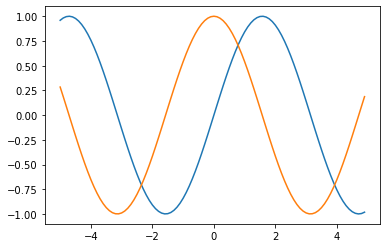

In [9]:
import matplotlib.pyplot as plt
x=(np.arange(100)-50)/10

# построение графиков
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

# вывод графиков
plt.show()

**[matplotlib.pyplot.imshow(x)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow)** - отображение данных в виде изображения (на обычном 2D-растре)

**[matplotlib.pyplot.colorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar)** - добавление шкалы палитры к графику

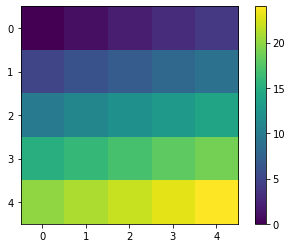

In [10]:
grad = np.arange(25,dtype=np.float32).reshape(5,5)

# отображение данных в виде изображения (на обычном 2D-растре)
plt.imshow(grad)

# добавление шкалы палитры к графику
plt.colorbar()
plt.show()

## Работа с файлами и сетью

Доступ к внешним сетевым ресурсам в Azure Notebooks ограничен:

 * Сервера Microsoft Azure (Storage, ...)
 * Github
 
При этом доступно локальное (ограниченное по объему) хранилище файлов, с которым можно работать.

**[Модуль os](https://docs.python.org/3/library/os.html)** предоставляет множество функций для работы с операционной системой, причём их поведение, как правило, не зависит от ОС, поэтому программы остаются переносимыми

**[os.path](https://docs.python.org/3/library/os.path.html)** - этот модуль реализует некоторые полезные функции для имени пути

**[os.path.exists(x)](https://docs.python.org/3/library/os.path.html#os.path.exists)** - проверка наличия пути **`x`**

**[PIL](https://pillow.readthedocs.io/en/stable/)** - это библиотека языка **`Python`**, предназначенная для работы с растровой графикой

Установка **PIL** через **Anaconda**:
- `conda install -c anaconda pillow`

**[PIL.Image](https://pillow.readthedocs.io/en/stable/reference/Image.html)** - модуль, который используется для представления изображения **`PIL`**

**[PIL.Image.open(x)](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open)** - идентификации файла (изображения)

**[Wget](https://ru.wikipedia.org/wiki/Wget)** - (GNU Wget) свободная неинтерактивная консольная программа для загрузки файлов по сети. Поддерживает протоколы HTTP, FTP и HTTPS, а также поддерживает работу через HTTP прокси-сервер. Программа включена почти во все дистрибутивы GNU/Linux

Для установки при на время выполнения в **Jupyter Notebook** необходимо использовать следующую команду:
- `pip install wget`

In [11]:
# pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=5fe8da28a1056317eb436c6310a8f42b3ce7c12c3e714bcd67d9016378bdca7e
  Stored in directory: c:\users\nasyb\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


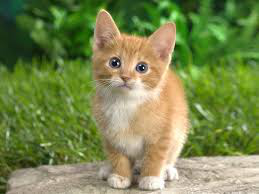

In [13]:
import os

# загрузка изображения, если нет в текущем репозитории
if not os.path.exists("../images/kitten.jpg"):
    !wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/kitten.jpg

import PIL

# открытие изображение и его вывод
img = PIL.Image.open('../images/kitten.jpg')
img

## Работа с изображениями

**[numpy.array(x)](https://numpy.org/doc/stable/reference/generated/numpy.array.html?highlight=array#numpy.array)** - получение массива из объекта

**[numpy.minimum(x)](https://numpy.org/doc/stable/reference/generated/numpy.minimum.html?highlight=minimum#numpy.minimum)** - поэлементный минимум элементов массива

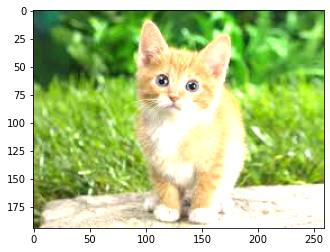

In [15]:
pixels = np.array(img)

# увеличение яркости катинки на 50 %
pixels = pixels.astype(np.float32)/256.0
plt.imshow(np.minimum(1.0,pixels*1.5))

plt.show()

**[Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/)** - модуль для работы с интерактивными виджетами

Установка **Ipywidgets** через **Anaconda**:
- `conda install -c anaconda ipywidgets`

**[interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html?highlight=interact#Using-Interact)** - автоматически создает элементы управления пользовательского интерфейса (UI) для интерактивного изучения кода и данных

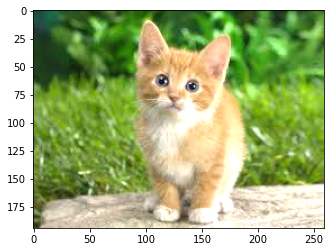

<function __main__.show(lum)>

In [16]:
from ipywidgets import interact
import ipywidgets as widgets

def show(lum):
    plt.imshow(np.minimum(1.0,pixels*lum))
    plt.show()
    
interact(show, lum=(0.5,2.0))

## Когнитивные сервисы

In [17]:
import requests
import json

def analyze_image(image_url, api_key):
    url = "https://westus.api.cognitive.microsoft.com/vision/v1.0/analyze?visualFeatures=Tags,Description"
    headers = {"Content-Type": "application/json", "Ocp-Apim-Subscription-Key": api_key}
    body = "{{'url': '{}'}}".format(image_url)
    r = requests.post(url, headers=headers, data=body)
    result = json.loads(r.text)
    return result

res = analyze_image('https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/kitten.jpg','---- KEY HERE ----')
res

{'error': {'code': '401',
  'message': 'Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.'}}

**[matplotlib.pyplot.bar(x)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)** - построение гистограммы

**[matplotlib.pyplot.xticks(x)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks)** - Получить или установить текущие положения делений и метки оси x

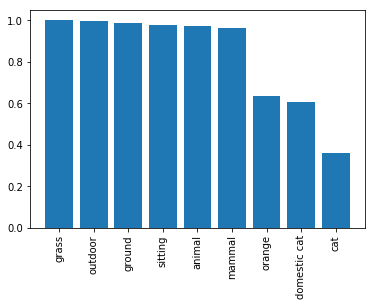

In [22]:
def slice(kw,arr):
    return [x[kw] for x in arr]
plt.bar(range(len(res['tags'])),slice('confidence',res['tags']))
plt.xticks(range(len(res['tags'])),slice('name',res['tags']),rotation='vertical')
plt.show()

In [23]:
print(res['description']['captions'][0]['text'])

a cat sitting on the grass
